In [1]:
from pycqed import *
import matplotlib.pyplot as plt
import numpy as np

Circuit without coordinate transformation:

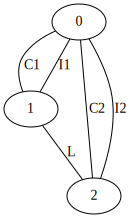

In [2]:
s = CircuitGraph()
s.addBranch(0, 1, "C1")
s.addBranch(0, 1, "I1")
s.addBranch(1, 2, "L")
s.addBranch(2, 0, "C2")
s.addBranch(2, 0, "I2")
s.drawGraphViz()

In [3]:
sym = SymbolicSystem(s)

Optimal basis representations for the circuit coordinates:
{2: 'charge', 1: 'charge'}


In [4]:
sym.getQuantumHamiltonian()

Matrix([[-0.5*I_{1}*(1.0*e^{i\phi_{01-1e}}*D_{1} + 1.0*conjugate(e^{i\phi_{01-1e}})*D^{\dagger}_{1}) - 0.5*I_{2}*(1.0*D^{\dagger}_{2} + 1.0*D_{2}) + (-0.5*\Phi_{1}/L_{} + 0.5*\Phi_{2}/L_{})*\Phi_{2} + (0.5*\Phi_{1}/L_{} - 0.5*\Phi_{2}/L_{})*\Phi_{1} + 0.5*Q_{2}**2/C_{2} + 0.5*Q_{1}**2/C_{1}]])

In [5]:
sym.flux_bias

{(0, 1, 1): \Phi_{01-1e}, (0, 2, 1): 0.0, (2, 1, 0): 0.0}

In [6]:
sym.getFluxBiasMatrix(mode="branch")

Matrix([
[1.0*\Phi_{01-1e}, 0, 0],
[               0, 0, 0],
[               0, 0, 0]])

In [7]:
sym.getParameterNamesList()

['C1', 'I1', 'C2', 'I2', 'L', 'phi01-1e']

In [8]:
Ca = 60 # fF/um^2
Jc = 3  # uA/um^2
Aj = 0.3**2 # um^2
h = NumericalSystem(sym)
h.configureOperator(1, 20, "charge")
h.configureOperator(2, 20, "charge")
h.setParameterValues(
    'C1', Ca*Aj,
    'C2', Ca*Aj,
    'I1', Jc*Aj,
    'I2', Jc*Aj,
    'L', 100.0,
    'phi01-1e', 0.5
)
print("Hilbert space size:", h.getHilbertSpaceSize())

Using existing PyCQED tmp output root directory '/tmp/.pycqed/'.
Hilbert space size: 1681


In [9]:
h.Pbsm

matrix([[0.5, 0. , 0. ],
        [0. , 0. , 0. ],
        [0. , 0. , 0. ]])

In [10]:
h.Dl

matrix([[1.0, 0, 0],
        [0, 1.0, 0],
        [0, 0,
         Quantum object: dims = [[41, 41], [41, 41]], shape = (1681, 1681), type = oper, isherm = False
         Qobj data =
         [[0. 1. 0. ... 0. 0. 0.]
          [0. 0. 1. ... 0. 0. 0.]
          [0. 0. 0. ... 0. 0. 0.]
          ...
          [0. 0. 0. ... 0. 1. 0.]
          [0. 0. 0. ... 0. 0. 1.]
          [0. 0. 0. ... 0. 0. 0.]]                                                                     ]],
       dtype=object)

In [11]:
h.Jvec

Matrix([
[I_{1}],
[I_{2}],
[    0]])

In [12]:
h.newSweep()
h.addSweep('phi01-1e', -1.0, 1.0, 11)
sweep = h.paramSweep(timesweep=True)

Parameter Sweep Duration:
  Initialization:	0.032 s
  Loop duration:	14.959 s
  Avg iteration:	1.360 s


Text(0, 0.5, '$E_{g,i}$ (GHz)')

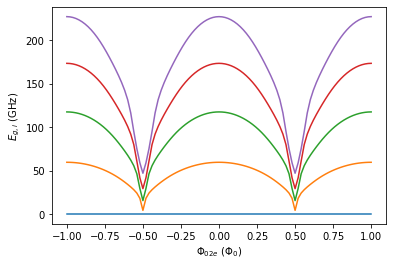

In [25]:
x,sweep_p,v = h.getSweep(sweep,'phi02-1e',{})
for i in range(5):
    y = sweep_p[i] - sweep_p[0]
    plt.plot(x,y)
plt.xlabel("$\\Phi_{02e}$ ($\\Phi_0$)")
plt.ylabel("$E_{g,i}$ (GHz)")

Circuit with coordinate transformations

In [3]:
sym = SymbolicSystem(s, mode_transform=True)

Optimal basis representations for the circuit coordinates:
{1: 'charge', 2: 'oscillator'}


In [4]:
sym.getQuantumHamiltonian()

Matrix([[-0.5*I_{1}*(1.0*e^{i\phi_{01-1e}}*D_{1} + 1.0*conjugate(e^{i\phi_{01-1e}})*D^{\dagger}_{1}) - 0.5*I_{2}*(1.0*D^{\dagger}_{2} + 1.0*D_{2}) + (0.5*(-0.5/C_{2} + 0.5/C_{1})*Q_{1} + 0.5*(0.5/C_{2} + 0.5/C_{1})*Q_{2})*Q_{2} + (0.5*(-0.5/C_{2} + 0.5/C_{1})*Q_{2} + 0.5*(0.5/C_{2} + 0.5/C_{1})*Q_{1})*Q_{1} + 1.0*\Phi_{2}**2/L_{}]])

In [9]:
sym.getLeftDecompFluxVector()

Matrix([
[           0],
[           0],
[1.0*\Phi_{2}]])

In [10]:
sym.getRightDecompFluxVector()

Matrix([
[-1.0*\Phi_{1}],
[-1.0*\Phi_{2}],
[-1.0*\Phi_{1}]])

In [11]:
sym.getLeftDisplacementOpMatrix(as_vec=True)

Matrix([
[    1],
[    1],
[D_{2}]])

In [12]:
(sym.Rnb - np.abs(sym.Rnb))*sym.getFluxVector()

Matrix([
[-2.0*\Phi_{1}],
[-2.0*\Phi_{2}],
[-2.0*\Phi_{1}]])

In [13]:
sym.flux_bias

{(0, 1, 1): \Phi_{01-1e}, (0, 2, 1): 0.0, (2, 1, 0): 0.0}

In [14]:
sym.getFluxBiasMatrix(mode="branch")

Matrix([
[1.0*\Phi_{01-1e}, 0, 0],
[               0, 0, 0],
[               0, 0, 0]])

In [15]:
sym.getParameterNamesList()

['C1', 'I1', 'C2', 'I2', 'L', 'phi01-1e']

In [13]:
Ca = 60 # fF/um^2
Jc = 3  # uA/um^2
Aj = 0.3**2 # um^2
h = NumericalSystem(sym)
h.configureOperator(1, 20, "charge")
h.configureOperator(2, 20, "oscillator")
h.setParameterValues(
    'C1', Ca*Aj,
    'C2', Ca*Aj,
    'I1', Jc*Aj,
    'I2', Jc*Aj,
    'L', 100.0,
    'phi01-1e', 0.5
)
print("Hilbert space size:", h.getHilbertSpaceSize())

Using existing PyCQED tmp output root directory '/tmp/.pycqed/'.
Hilbert space size: 820


In [34]:
h.Pbsm

matrix([[0.5, 0. , 0. ],
        [0. , 0. , 0. ],
        [0. , 0. , 0. ]])

In [35]:
h.Dl

matrix([[1.0, 0, 0],
        [0, 1.0, 0],
        [0, 0,
         Quantum object: dims = [[41, 20], [41, 20]], shape = (820, 820), type = oper, isherm = False
         Qobj data =
         [[ 0.9768497 +0.j          0.        +0.21142635j -0.03235754+0.j
           ...  0.        +0.j          0.        +0.j
            0.        +0.j        ]
          [ 0.        +0.21142635j  0.93108923+0.j          0.        +0.29199865j
           ...  0.        +0.j          0.        +0.j
            0.        +0.j        ]
          [-0.03235754+0.j          0.        +0.29199865j  0.88640058+0.j
           ...  0.        +0.j          0.        +0.j
            0.        +0.j        ]
          ...
          [ 0.        +0.j          0.        +0.j          0.        +0.j
           ...  0.33462544+0.j          0.        +0.57642476j
           -0.34907844+0.j        ]
          [ 0.        +0.j          0.        +0.j          0.        +0.j
           ...  0.        +0.57642476j  0.27512439+

In [14]:
h.newSweep()
h.addSweep('phi01-1e', -1.0, 1.0, 11)
sweep = h.paramSweep(timesweep=True)

[[1.+2.4492937e-16j 0.+0.0000000e+00j 0.+0.0000000e+00j]
 [0.+0.0000000e+00j 1.+0.0000000e+00j 0.+0.0000000e+00j]
 [0.+0.0000000e+00j 0.+0.0000000e+00j 1.+0.0000000e+00j]]
[[0.309017+0.95105654j 0.      +0.j         0.      +0.j        ]
 [0.      +0.j         1.      +0.j         0.      +0.j        ]
 [0.      +0.j         0.      +0.j         1.      +0.j        ]]
[[-0.809017+0.58778524j  0.      +0.j          0.      +0.j        ]
 [ 0.      +0.j          1.      +0.j          0.      +0.j        ]
 [ 0.      +0.j          0.      +0.j          1.      +0.j        ]]
[[-0.809017-0.58778524j  0.      +0.j          0.      +0.j        ]
 [ 0.      +0.j          1.      +0.j          0.      +0.j        ]
 [ 0.      +0.j          0.      +0.j          1.      +0.j        ]]
[[0.309017-0.95105654j 0.      +0.j         0.      +0.j        ]
 [0.      +0.j         1.      +0.j         0.      +0.j        ]
 [0.      +0.j         0.      +0.j         1.      +0.j        ]]
[[1.+0.j 0.+0.

Text(0, 0.5, '$E_{g,i}$ (GHz)')

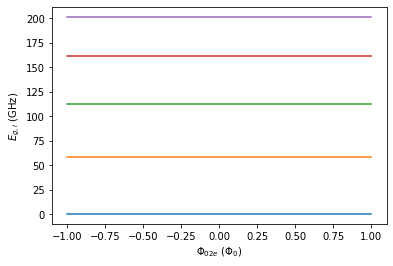

In [7]:
x,sweep_v,v = h.getSweep(sweep,'phi01-1e',{})
for i in range(5):
    y = sweep_v[i] - sweep_v[0]
    plt.plot(x,y)
plt.xlabel("$\\Phi_{02e}$ ($\\Phi_0$)")
plt.ylabel("$E_{g,i}$ (GHz)")

Text(0, 0.5, '$E_{g,i}$ (GHz)')

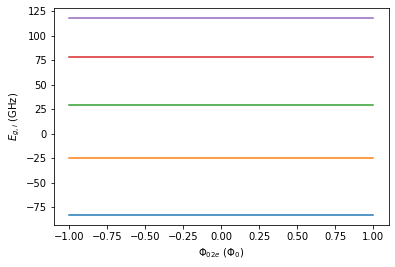

In [9]:
x,sweep_v,v = h.getSweep(sweep,'phi01-1e',{})
for i in range(5):
    y = sweep_v[i]
    plt.plot(x,y)
plt.xlabel("$\\Phi_{02e}$ ($\\Phi_0$)")
plt.ylabel("$E_{g,i}$ (GHz)")

Text(0, 0.5, '$E_{g,i}$ (GHz)')

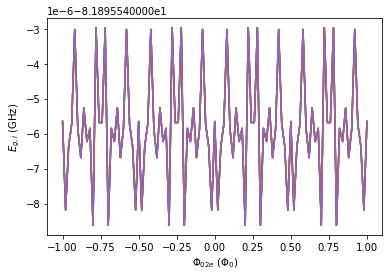

In [19]:
x,sweep_v,v = h.getSweep(sweep,'phi01-1e',{})
for i in range(5):
    y = sweep_v[0]
    plt.plot(x,y)
plt.xlabel("$\\Phi_{02e}$ ($\\Phi_0$)")
plt.ylabel("$E_{g,i}$ (GHz)")

In [22]:
symbol = sym.R*sym.getFluxVector()

In [23]:
symbol

Matrix([
[-0.707106781186547*\Phi_{1} - 0.707106781186547*\Phi_{2}],
[-0.707106781186547*\Phi_{1} + 0.707106781186547*\Phi_{2}]])

In [52]:
sym.RinvT*sym.getChargeVector()

Matrix([
[-0.707106781186548*Q_{1} - 0.707106781186548*Q_{2}],
[-0.707106781186548*Q_{1} + 0.707106781186548*Q_{2}]])

In [24]:
dir(symbol)

['C',
 'D',
 'H',
 'LDLdecomposition',
 'LDLsolve',
 'LUdecomposition',
 'LUdecompositionFF',
 'LUdecomposition_Simple',
 'LUsolve',
 'QRdecomposition',
 'QRsolve',
 'T',
 '__abs__',
 '__add__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__pow__',
 '__radd__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmatmul__',
 '__rmul__',
 '__rsub__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__weakref__',
 '_class_priority',
 '_diff_wrt',
 '_dod_to_DomainMatrix',
 '_eval_Abs',
 '_eval_Mod',
 '_eval_add',
 '_eval_adjoint',
 '_eval_applyfunc',
 '_eval_as_real_imag',
 '_eval_atom

In [42]:
symbol[0].simplify()

0.707106781186547*(-\Phi_{1} - \Phi_{2})

In [41]:
for e in (symbol[1]).simplify().atoms():
    print(e)

\Phi_{2}
\Phi_{1}
-1
0.707106781186547


In [31]:
symbol[0]

-0.707106781186547*\Phi_{1} - 0.707106781186547*\Phi_{2}

In [44]:
Linv = sym.getInverseInductanceMatrix()

In [45]:
Linv

Matrix([
[0,        0],
[0, 2.0/L_{}]])

In [46]:
subs = {sym: 1.0 for sym in Linv.free_symbols}
Mnp = np.asmatrix(Linv.subs(subs), dtype=np.float64)

In [47]:
Mnp

matrix([[0., 0.],
        [0., 2.]])

In [48]:
np.linalg.inv(Mnp)

LinAlgError: Singular matrix

In [49]:
np.linalg.inv(sym.R)

matrix([[-0.70710678, -0.70710678],
        [-0.70710678,  0.70710678]])

In [50]:
sym.R

matrix([[-0.70710678, -0.70710678],
        [-0.70710678,  0.70710678]])

In [51]:
sym.R[0]

matrix([[-0.70710678, -0.70710678]])

In [53]:
1/np.sqrt(2)

0.7071067811865475

In [8]:
import sympy as sy

In [9]:
m = np.matrix([
    [-1, 0, 0.5, 0.5, -0.5, -0.5, 1],
    [0, 0, 0.5, 0.5, -0.5, -0.5, 0],
    [0.5, 0, -0.25, -0.25, -0.25, -0.25, 0.5],
    [0, 0, 0, 0, -1, 1, 0],
    [0, 0, 1, -1, 0, 0, 0],
    [0, 1, -0.25, -0.25, -0.25, -0.25, 0],
    [0, 1, 0, 0, 0, 0, 0]
])

In [18]:
M = sy.Matrix(m)

In [29]:
vec = sy.Matrix(list(sy.symbols("a_1 a_2 a_3 a_4 a_5 a_6 a_7")))

In [30]:
M*vec

Matrix([
[   -1.0*a_1 + 0.5*a_3 + 0.5*a_4 - 0.5*a_5 - 0.5*a_6 + 1.0*a_7],
[                        0.5*a_3 + 0.5*a_4 - 0.5*a_5 - 0.5*a_6],
[0.5*a_1 - 0.25*a_3 - 0.25*a_4 - 0.25*a_5 - 0.25*a_6 + 0.5*a_7],
[                                           -1.0*a_5 + 1.0*a_6],
[                                            1.0*a_3 - 1.0*a_4],
[          1.0*a_2 - 0.25*a_3 - 0.25*a_4 - 0.25*a_5 - 0.25*a_6],
[                                                      1.0*a_2]])

In [31]:
(M.T)**(-1)*vec

Matrix([
[                                                 -0.5*a_1 + 0.5*a_7],
[          0.5*a_1 + 0.5*a_3 + 0.5*a_4 - 0.5*a_5 - 0.5*a_6 - 0.5*a_7],
[                                                  1.0*a_1 + 1.0*a_7],
[                                                 -0.5*a_5 + 0.5*a_6],
[                                                  0.5*a_3 - 0.5*a_4],
[         -1.0*a_1 - 1.0*a_3 - 1.0*a_4 - 1.0*a_5 - 1.0*a_6 - 1.0*a_7],
[1.0*a_1 + 1.0*a_2 + 1.0*a_3 + 1.0*a_4 + 1.0*a_5 + 1.0*a_6 + 1.0*a_7]])

In [37]:
vec = sym.R*sym.getFluxVector()

In [45]:
sym.Rnb*vec

Matrix([
[                                           -0.707106781186547*(-\Phi_{1} - \Phi_{2})],
[                                           -0.707106781186547*(-\Phi_{1} + \Phi_{2})],
[-0.707106781186547*(-\Phi_{1} - \Phi_{2}) + 0.707106781186547*(-\Phi_{1} + \Phi_{2})]])

In [47]:
sym.getJosephsonVector()

Matrix([
[I_{1}],
[I_{2}],
[    0]])

In [48]:
sym.getFluxVector(mode="branch")

Matrix([
[               -1.0*\Phi_{1}],
[               -1.0*\Phi_{2}],
[-1.0*\Phi_{1} + 1.0*\Phi_{2}]])

In [49]:
sym.getLeftDecompFluxVector()

Matrix([
[           0],
[           0],
[1.0*\Phi_{2}]])

In [50]:
sym.getRightDecompFluxVector()

Matrix([
[-1.0*\Phi_{1}],
[-1.0*\Phi_{2}],
[-1.0*\Phi_{1}]])